## Loading the dataset from my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/YOLOV8_Training/

runs  syn.v3i.yolov8.zip  yolo11n.pt  yolov8n.pt


In [ ]:
%cd /content/drive/MyDrive/YOLOV8_Training/

/content/drive/MyDrive/YOLOV8_Training


In [ ]:
#!unzip syn.v3i.yolov8.zip -d /content/dataset

In [ ]:
!ls /content/dataset/


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!pip install ultralytics

## Once Ultralytics library is installed, I'll use YOLOV8n (n = nano), (s=small), since edge processing is a priority, I'll be running on n

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Could use 'yolov8s.pt' for better accuracy

# Train on the extracted dataset
model.train(data="/content/dataset/data.yaml", epochs=50, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det

100%|██████████| 755k/755k [00:00<00:00, 132MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/dataset/train/labels... 1397 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1397/1397 [00:01<00:00, 785.20it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 398 images, 0 backgrounds, 0 corrupt: 100%|██████████| 398/398 [00:00<00:00, 524.62it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.38G     0.7489       2.98     0.8935         38        640: 100%|██████████| 88/88 [00:28<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]

                   all        398       3022      0.527      0.249      0.488      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.42G     0.6316      1.353     0.8668         83        640: 100%|██████████| 88/88 [00:25<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]


                   all        398       3022      0.701      0.855      0.822      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.38G     0.5824     0.9956     0.8557         85        640: 100%|██████████| 88/88 [00:25<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]


                   all        398       3022       0.86      0.894      0.925      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.38G     0.5619     0.8931      0.855         82        640: 100%|██████████| 88/88 [00:25<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]


                   all        398       3022       0.89      0.906      0.949      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.37G     0.5469     0.7898     0.8513         73        640: 100%|██████████| 88/88 [00:25<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]


                   all        398       3022      0.964      0.955      0.982      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.38G     0.5282     0.6967     0.8476         21        640: 100%|██████████| 88/88 [00:25<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]


                   all        398       3022       0.97      0.965      0.988      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.33G      0.522     0.6636     0.8484         65        640: 100%|██████████| 88/88 [00:25<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]

                   all        398       3022      0.961      0.962      0.985        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.41G     0.5036     0.6465      0.843         52        640: 100%|██████████| 88/88 [00:24<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.65it/s]

                   all        398       3022      0.969      0.969      0.986      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.32G     0.4998      0.609      0.842         52        640: 100%|██████████| 88/88 [00:26<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


                   all        398       3022      0.976      0.969      0.991      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.4G     0.4928     0.5799     0.8455         41        640: 100%|██████████| 88/88 [00:25<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]

                   all        398       3022      0.979      0.977      0.992      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.39G     0.4912     0.5522     0.8441         46        640: 100%|██████████| 88/88 [00:24<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]

                   all        398       3022      0.976       0.97       0.99      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G     0.4857     0.5313     0.8411         61        640: 100%|██████████| 88/88 [00:25<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]


                   all        398       3022      0.983       0.98      0.993      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.37G     0.4854      0.524     0.8415         42        640: 100%|██████████| 88/88 [00:25<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]


                   all        398       3022      0.981      0.977      0.991      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.38G     0.4708     0.5142      0.839         38        640: 100%|██████████| 88/88 [00:25<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.84it/s]

                   all        398       3022      0.985      0.978      0.992      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.4G     0.4716     0.4949     0.8379         75        640: 100%|██████████| 88/88 [00:25<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.74it/s]


                   all        398       3022      0.985       0.97      0.991      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.37G     0.4683     0.4862     0.8386         41        640: 100%|██████████| 88/88 [00:24<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]

                   all        398       3022      0.973      0.971       0.99      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.36G     0.4629      0.468     0.8347         93        640: 100%|██████████| 88/88 [00:24<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]

                   all        398       3022       0.99      0.984      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.28G     0.4598     0.4552     0.8369         77        640: 100%|██████████| 88/88 [00:24<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.61it/s]

                   all        398       3022      0.988      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.4G     0.4519     0.4424     0.8368         37        640: 100%|██████████| 88/88 [00:23<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.73it/s]

                   all        398       3022      0.991       0.98      0.993      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.39G     0.4502     0.4325     0.8328         36        640: 100%|██████████| 88/88 [00:23<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]

                   all        398       3022      0.989      0.983      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.38G     0.4496     0.4281     0.8313         84        640: 100%|██████████| 88/88 [00:25<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]

                   all        398       3022      0.992      0.981      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.29G      0.441     0.4141      0.831         53        640: 100%|██████████| 88/88 [00:25<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.73it/s]


                   all        398       3022       0.99      0.983      0.993       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.37G     0.4421     0.4108     0.8303         55        640: 100%|██████████| 88/88 [00:25<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.80it/s]

                   all        398       3022      0.993      0.983      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.39G     0.4376     0.4087     0.8297        113        640: 100%|██████████| 88/88 [00:25<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.85it/s]

                   all        398       3022      0.995      0.987      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.37G       0.43     0.3988     0.8306         39        640: 100%|██████████| 88/88 [00:25<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]

                   all        398       3022      0.988      0.984      0.994      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.39G     0.4378     0.3986     0.8308         44        640: 100%|██████████| 88/88 [00:27<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.64it/s]

                   all        398       3022      0.994      0.986      0.994      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.28G     0.4295     0.3852     0.8297         53        640: 100%|██████████| 88/88 [00:24<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        398       3022      0.994      0.985      0.994      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.46G     0.4278     0.3819     0.8283         55        640: 100%|██████████| 88/88 [00:25<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]

                   all        398       3022      0.994      0.985      0.994      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.39G     0.4228     0.3753     0.8285         18        640: 100%|██████████| 88/88 [00:26<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.81it/s]

                   all        398       3022      0.996      0.987      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.28G     0.4203     0.3713     0.8293         56        640: 100%|██████████| 88/88 [00:25<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.74it/s]

                   all        398       3022      0.996      0.986      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.3G     0.4212     0.3643     0.8288         46        640: 100%|██████████| 88/88 [00:25<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.90it/s]

                   all        398       3022      0.995      0.988      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.31G     0.4183     0.3643     0.8276         31        640: 100%|██████████| 88/88 [00:25<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]


                   all        398       3022      0.996      0.987      0.994      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.37G     0.4158     0.3605      0.828         86        640: 100%|██████████| 88/88 [00:25<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]

                   all        398       3022      0.995      0.987      0.994      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.28G     0.4184     0.3622      0.829         67        640: 100%|██████████| 88/88 [00:25<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]

                   all        398       3022      0.996      0.988      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.32G     0.4113     0.3536     0.8243        112        640: 100%|██████████| 88/88 [00:26<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]

                   all        398       3022      0.997      0.987      0.994      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.51G     0.4117     0.3506     0.8243         82        640: 100%|██████████| 88/88 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.74it/s]

                   all        398       3022      0.996      0.989      0.994      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.41G     0.4089     0.3504     0.8253         51        640: 100%|██████████| 88/88 [00:25<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]

                   all        398       3022      0.996      0.987      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.39G     0.4029     0.3361     0.8236         55        640: 100%|██████████| 88/88 [00:25<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.73it/s]

                   all        398       3022      0.994      0.989      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.41G     0.4048      0.339     0.8267         24        640: 100%|██████████| 88/88 [00:25<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]


                   all        398       3022      0.994      0.985      0.994      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.28G      0.404     0.3362      0.823         68        640: 100%|██████████| 88/88 [00:25<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.66it/s]

                   all        398       3022      0.996      0.987      0.994      0.947


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.29G     0.3726     0.3008     0.8108         36        640: 100%|██████████| 88/88 [00:26<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.59it/s]

                   all        398       3022      0.994      0.985      0.994      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.27G     0.3722      0.299     0.8134         26        640: 100%|██████████| 88/88 [00:22<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.65it/s]

                   all        398       3022      0.993      0.987      0.994      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.27G     0.3663     0.2945     0.8112         27        640: 100%|██████████| 88/88 [00:23<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]

                   all        398       3022      0.996      0.987      0.994      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.27G     0.3653     0.2887      0.814         36        640: 100%|██████████| 88/88 [00:22<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]

                   all        398       3022      0.994      0.989      0.994      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.27G     0.3664     0.2873     0.8139         42        640: 100%|██████████| 88/88 [00:22<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.65it/s]

                   all        398       3022      0.996      0.986      0.994      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.27G      0.359     0.2797     0.8091         32        640: 100%|██████████| 88/88 [00:22<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]


                   all        398       3022      0.997      0.988      0.994       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.27G     0.3571     0.2763     0.8099         47        640: 100%|██████████| 88/88 [00:23<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]

                   all        398       3022      0.996      0.989      0.994      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.27G     0.3552     0.2727       0.81         43        640: 100%|██████████| 88/88 [00:23<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]


                   all        398       3022      0.997      0.989      0.995       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.27G     0.3535     0.2681     0.8077         40        640: 100%|██████████| 88/88 [00:22<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]


                   all        398       3022      0.996      0.989      0.994      0.952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.27G     0.3555     0.2685     0.8111         41        640: 100%|██████████| 88/88 [00:22<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.80it/s]


                   all        398       3022      0.996      0.987      0.994      0.952

50 epochs completed in 0.418 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]


                   all        398       3022      0.996      0.989      0.994      0.952
                circle        176        242      0.995      0.996      0.995      0.973
                 cross        160        232      0.997      0.987      0.995      0.983
              heptagon        177        253      0.996      0.991      0.991      0.958
               hexagon        172        242      0.998      0.988      0.995      0.945
               octagon        184        256      0.996      0.991      0.995      0.964
              pentagon        178        246      0.998      0.976      0.994      0.928
        quarter_circle        155        211      0.998      0.981      0.995       0.97
             rectangle        172        236      0.996      0.983      0.995      0.982
            semicircle        179        238      0.999          1      0.995      0.954
                square        157        210      0.978       0.99      0.991      0.987
                  sta

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd424f75190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

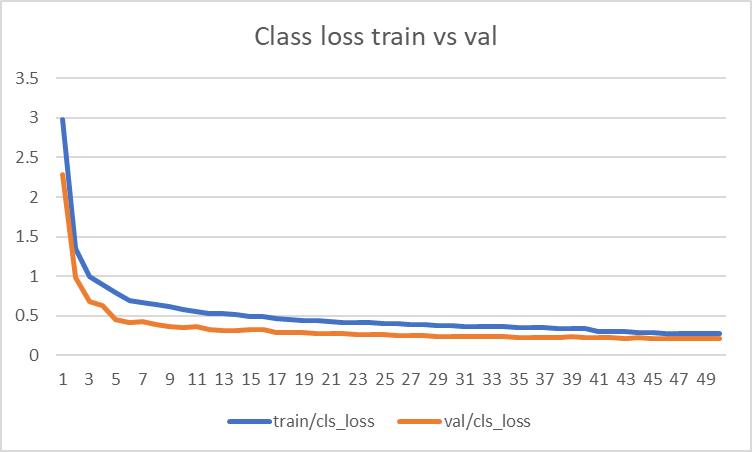

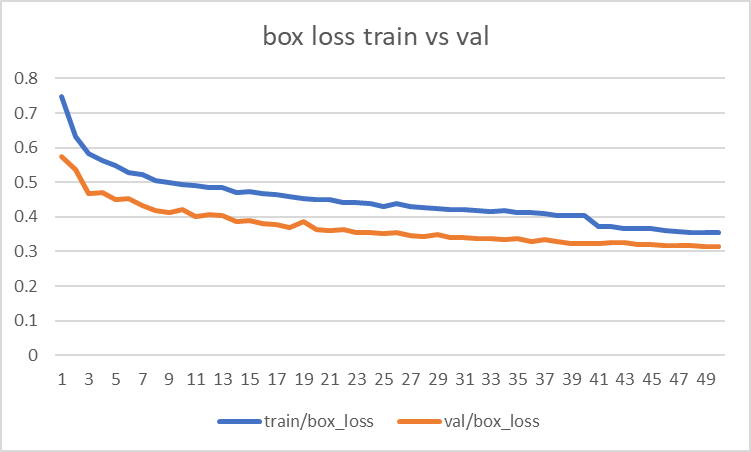

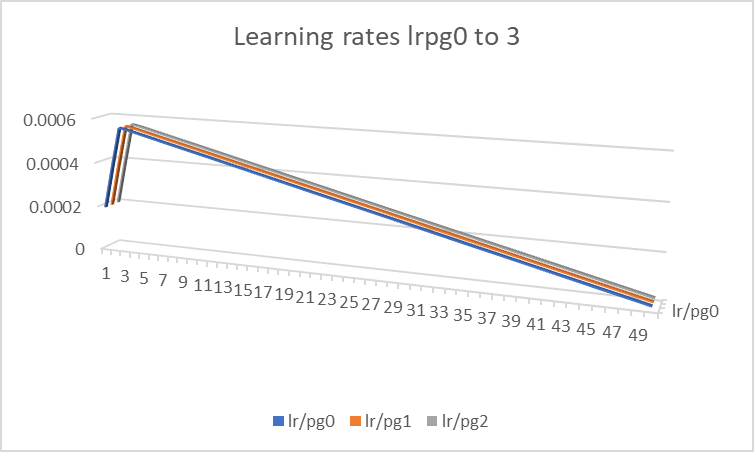

## What we can conclude from the above graphs is that:
- If train loss goes down but val loss goes up, youre overfitting.
- If both decrease steadily ; ur learning well.


## YOLOv8 has multiple parameter groups (backbone, neck, head).

- lr/pg0 : learning rate for backbone params
- lr/pg1 : for middle layers
- lr/pg2 : for final detection head

These change with learning rate scheduling (warmup, decay) & here, stable drops mean training is progressing normally.

In [ ]:
!apt-get update && apt-get install -y locales
!locale-gen en_US.UTF-8
!export LANG=en_US.UTF-8
!export LC_ALL=en_US.UTF-8

In [ ]:
!ls /content/drive/MyDrive/YOLOV8_Training/runs/detect/train2/

args.yaml					   R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		val_batch1_labels.jpg
events.out.tfevents.1739270475.111b6f54e93c.203.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					   train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					   train_batch3520.jpg	weights
P_curve.png					   train_batch3521.jpg
PR_curve.png					   train_batch3522.jpg


## Parmater tuning that coulda been done here

- Learning rate (lr0) : most impactful

- Batch size : can affect convergence

- Augmentation : for data diversity

- Momentum & weight decay : for stability

- Epochs : could be extended if still improving